In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as st
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("new_dataframe.csv")

In [ ]:
df.head()

,Unnamed: 0,user_id,hour,os,order_class,surge,app_opened,price_seen,order_made,ride_completed,user_cancelled,city_center_order,distance,age,rfm
0,0,867689,12,iOS,business,no surge,1,1,1,1,0,0,7.982135,20,low
1,1,752172,5,Android,economy,no surge,1,1,1,1,0,1,2.908468,27,high
2,2,486559,15,Android,comfort,no surge,1,1,1,1,0,0,7.224614,21,high
3,3,304024,0,Android,economy,no surge,1,1,1,1,0,1,1.874349,52,low
4,4,139420,0,Android,business,no surge,1,1,1,1,0,0,10.704778,19,low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101500 entries, 0 to 101499
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         101500 non-null  int64  
 1   user_id            101500 non-null  int64  
 2   hour               101500 non-null  int64  
 3   os                 101500 non-null  object 
 4   order_class        101500 non-null  object 
 5   surge              91431 non-null   object 
 6   app_opened         101500 non-null  int64  
 7   price_seen         101500 non-null  int64  
 8   order_made         101500 non-null  int64  
 9   ride_completed     101500 non-null  int64  
 10  user_cancelled     101500 non-null  int64  
 11  city_center_order  101500 non-null  int64  
 12  distance           91431 non-null   float64
 13  age                101500 non-null  int64  
 14  rfm                101500 non-null  object 
dtypes: float64(1), int64(10), object(4)
memory usage: 1

In [ ]:
df.columns

Index(['Unnamed: 0', 'user_id', 'hour', 'os', 'order_class', 'surge',
       'app_opened', 'price_seen', 'order_made', 'ride_completed',
       'user_cancelled', 'city_center_order', 'distance', 'age', 'rfm'],
      dtype='object')

# Метрика №1
Длина поездки в зависимости от класса поездки

In [ ]:
# Выделяем подгруппы в зависимости от классов поездки
eco = df[(df['order_class'] == 'economy') & (df['ride_completed'] == 1)]
com = df[(df['order_class'] == 'comfort') & (df['ride_completed'] == 1)]
bus = df[(df['order_class'] == 'business') & (df['ride_completed'] == 1)]

Вычисляем стастистики полю 'distance' для группы Economy и строим графики

In [ ]:
 #среднее
 st.mean(eco['distance'])

3.9874431552204417

In [ ]:
#медиана
eco['distance'].median()

3.359633823609632

In [ ]:
#95-й персентиль
eco['distance'].quantile(0.95)

9.389886007141877

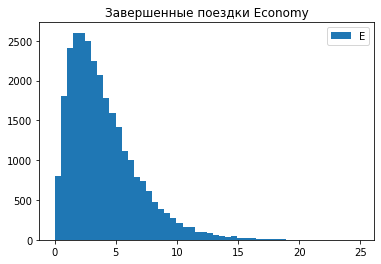

In [ ]:
#визуализация распеределения частотным графиком
plt.hist(eco['distance'], 50)
plt.title('Завершенные поездки Economy')
plt.legend('Economy')
plt.show()

Данное распеределение является логнормальным, положительно искаженным (среднее > медианы). Коэффициент эксцесса > 0 (пик острый)

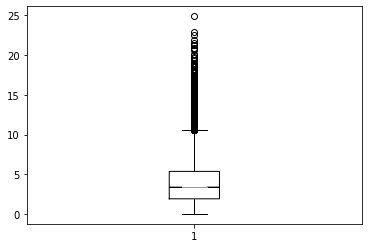

In [ ]:
#визуализация распеределения графиком "ящик с усами"
plt.boxplot(eco['distance'], 50)
plt.show()

На приведенном выше графике мы видим, что основные данные распределены компактно (размер "ящика" маленький), а так же то, что выборка имеет большой хвост и выбросы справа. Это можно интерпретировать следующим образом: большенство пользователей, выбирают класс Эконом для совершения коротких поездок, но есть пользователи, которые пользуются данным классом и для длинных поездок, но количество этих пользователей незначительно. 

Вычисляем стастистики полю 'distance' для группы Comfort и строим графики

In [ ]:
#среднее
st.mean(com['distance'])

5.026065956014429

In [ ]:
#медиана
com['distance'].median()

4.364484013651962

In [ ]:
#95-й персентиль
com['distance'].quantile(0.95)

11.267262101703517

In [ ]:
#визуализация распеределения частотным графиком
plt.hist(com['distance'], 50)
plt.title('Завершенные поездки Comfort')
plt.legend('Comfort')
plt.show()

Данное распеределение является логнормальным, положительно искаженным (среднее > медианы). Коэффициент эксцесса > 0 (пик острый)

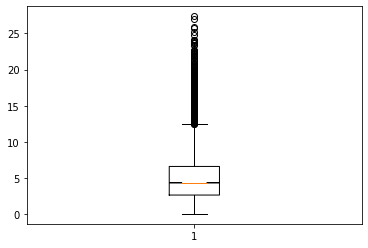

In [ ]:
#визуализация распеределения графиком "ящик с усами"
plt.boxplot(com['distance'], 50)
plt.show()

На приведенном выше графике мы видим, что основные данные распределены компактно (размер "ящика" маленький), а так же то, что выборка имеет большой хвост и выбросы справа. Это можно интерпретировать следующим образом: большенство пользователей, выбирают класс Комфорт для совершения коротких поездок, но есть пользователи, которые пользуются данным классом и для длинных поездок, но количество этих пользователей незначительно. 

Вычисляем стастистики полю 'distance' для группы Business и строим графики

In [ ]:
#среднее
st.mean(bus['distance'])

12.073728579471029

In [ ]:
#медиана
bus['distance'].median()

11.404922307374271

In [ ]:
#95-й персентиль
bus['distance'].quantile(0.95)

20.949958095497728

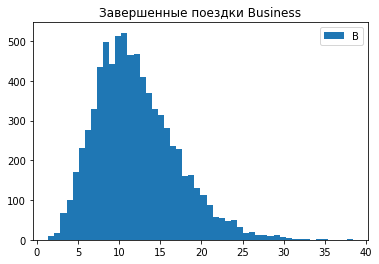

In [ ]:
#визуализация распеределения частотным графиком
plt.hist(bus['distance'], 50)
plt.title('Завершенные поездки Business')
plt.legend('Business')
plt.show()

Данное распеределение является логнормальным, положительно искаженным (среднее > медианы). Коэффициент эксцесса ~ 0 (пик пологий). Если сравнивать с графиками распределения по тарифам Эконом и Комфорт, то данный график более похож на график нормального распеределения.

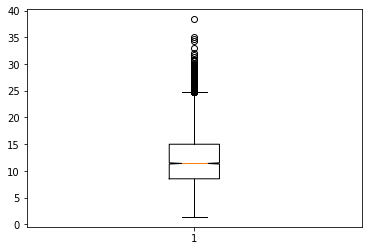

In [ ]:
#визуализация распеределения графиком "ящик с усами"
plt.boxplot(bus['distance'], 50)
plt.show()

На приведенном выше графике мы видим, что распределение данных стремится к нормальному (на это показывают одинаковые длины усов спарва и слева). Хвост справа пристутствует, но небольшой, ровно как и количество выбросов справа. Это можно интерпретировать следующим образом: пользователи выбирают тариф Бизнес в основном для поездок на средние и длинные дистанции.  

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

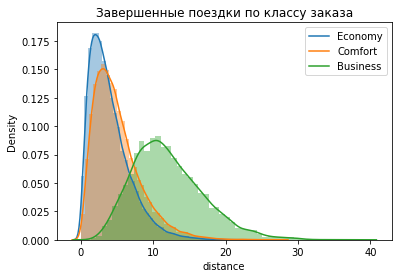

In [ ]:
#визуализация по всем группам
sns.distplot(eco['distance'], 50)
sns.distplot(com['distance'], 50)
sns.distplot(bus['distance'], 50)
plt.title('Завершенные поездки по классу заказа')
plt.legend(['Economy', 'Comfort', 'Business'])
plt.show()

Сравнив графики распеределения, мы можем сделать вывод, что для коротких поездок пользователи предпочитают тарифы Эконом и Комфорт, а для длинных поездок Бизнес.

## Метрика №2
Возраст отменяющих *поездки* в зависимости от платформы с которой сделан заказ

In [ ]:
 #выделяем группы
ios = df[(df['os'] == 'iOS') & (df['user_cancelled'] == 1)]
andr = df[(df['os'] == 'Android') & (df['user_cancelled'] == 1)]

Вычисляем стастистики полю 'age' для группы IOS и строим графики

In [ ]:
#среднее
st.mean(ios['age'])

26.14479060265577

In [ ]:
#медиана
ios['age'].median()

24.0

In [ ]:
#95-й пересентиль
ios['age'].quantile(0.95)

43.0

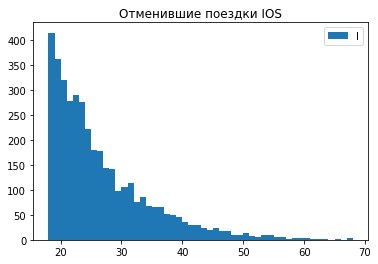

In [ ]:
#визуализация распеределения частотным графиком
plt.hist(ios['age'], 50)
plt.title('Отменившие поездки IOS')
plt.legend('IOS')
plt.show()

Данное распеределение является логнормальным, положительно искаженным (среднее > медианы). Коэффициент эксцесса > 0 (пик острый).

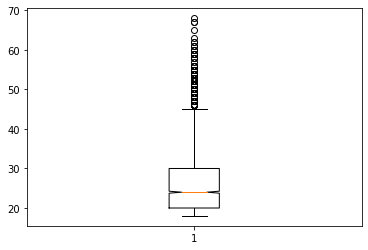

In [ ]:
#визуализация распеределения графиком "ящик с усами"
plt.boxplot(ios['age'], 50)
plt.show()

На приведенном выше графике мы видим, что основные данные распределены компактно (размер "ящика" маленький), а так же то, что выборка имеет большой хвост и выбросы справа. Это можно интерпретировать следующим образом: в основном отменяют поездки пользователи в возрасте от 18 до 45 лет, а пользователи старшего возраста отличаются большим постоянством (либо их количество меньше).

Вычисляем стастистики полю 'age' для группы Android и строим графики

In [ ]:
#среднее
st.mean(andr['age'])

26.211478308173536

In [ ]:
#медиана
andr['age'].median()

24.0

In [ ]:
#95-й персентиль
andr['age'].quantile(0.95)

44.0

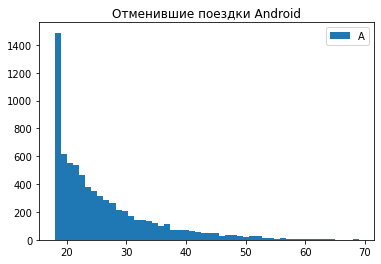

In [ ]:
#визуализация распеределения частотным графиком
plt.hist(andr['age'], 50)
plt.title('Отменившие поездки Android')
plt.legend('Android')
plt.show()

Данное распеределение является логнормальным, положительно искаженным (среднее > медианы). Коэффициент эксцесса > 0 (пик острый).

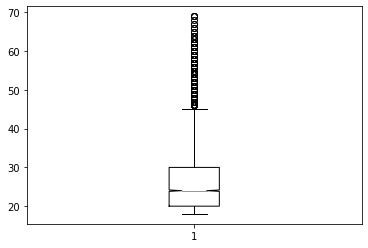

In [ ]:
#визуализация распеределения графиком "ящик с усами"
plt.boxplot(andr['age'], 50)
plt.show()

На приведенном выше графике мы видим, что основные данные распределены компактно (размер "ящика" маленький), а так же то, что выборка имеет большой хвост и выбросы справа. Это можно интерпретировать следующим образом: в основном отменяют поездки пользователи в возрасте от 18 до 45 лет, а пользователи старшего возраста отличаются большим постоянством (либо их количество меньше).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


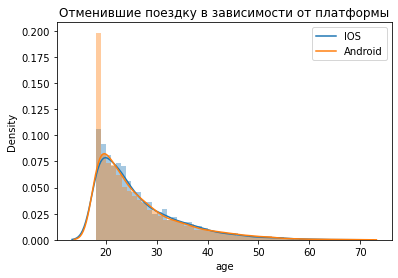

In [ ]:
#визуализация по обеим группам
sns.distplot(ios['age'], 50)
sns.distplot(andr['age'], 50)
plt.title('Отменившие поездку в зависимости от платформы')
plt.legend(['IOS', 'Android'])
plt.show()

Сравнение графиков показывает нам что 18-тилетние пользователи, пользующиеся платформой Android отменяют поездки гораздо чаще, чем их сверстники, пользующиеся платформой IOS.

# Метрика №3
Открытие приложения в зависимости от времени

In [ ]:
df1 = df[df.app_opened == 1].groupby(['hour']).agg({'user_id': "count"}).reset_index()

In [ ]:
df1.head()

,hour,user_id
0,0,4181
1,1,4185
2,2,4272
3,3,4255
4,4,4308


In [ ]:
df1.columns

Index(['hour', 'user_id'], dtype='object')

In [ ]:
#среднее
st.mean(df1['user_id'])

4229.166666666667

In [ ]:
#медиана
df1['user_id'].median()

4232.5

In [ ]:
#95-й персентиль
df1['user_id'].quantile(0.95)

4317.55

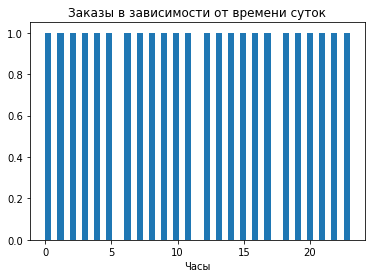

In [ ]:
#визуализация распеределения частотным графиком
plt.hist(df1['hour'], 50)
plt.title('Заказы в зависимости от времени суток')
plt.xlabel('Часы')
plt.show()

Данное распеределение является равномерным, без хвостов и выборосов, медиана ~ среднему. 

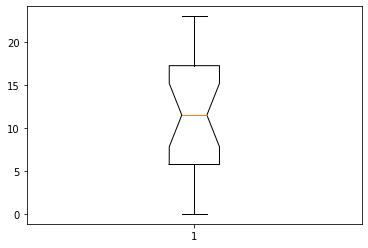

In [ ]:
#визуализация распеределения графиком "ящик с усами"
plt.boxplot(df1['hour'], 50)
plt.show()

Боксплот показывает ту же картину, что и гистограмма: распределение является равномерным (хотя, это довольно странно, так как в ночные часы количество поездок должно быть меньше, чем в дневные. Возможно, имеет место быть ошибка в данных, либо некорректный сбор.)

## Метрика №4 
Конверсия из открытия приложения в заказ в период высокого спроса в зависимости от возраста клиента

In [ ]:
df2 = df[(df.app_opened == 1) & (df.surge == 'surge')].groupby(['age']).agg({'user_id': "count"}).reset_index()
df3 = df[(df.order_made == 1) & (df.surge == 'surge')].groupby(['age']).agg({'user_id': "count"}).reset_index()

In [ ]:
df2.head()

,age,user_id
0,18,3406
1,19,3180
2,20,2608
3,21,2481
4,22,2212


In [ ]:
df3.head()

,age,user_id
0,18,2538
1,19,2323
2,20,1882
3,21,1801
4,22,1600


In [ ]:
df_merged = df2.merge(df3, left_on='age', right_on='age', how='inner')
df_merged.head()

,age,user_id_x,user_id_y
0,18,3406,2538
1,19,3180,2323
2,20,2608,1882
3,21,2481,1801
4,22,2212,1600


In [ ]:
df_merged = df_merged.rename(columns={'user_id_x' : 'app_opened', 'user_id_y' : 'order_made'})

In [ ]:
df_merged['conversion, %'] = round(df_merged['order_made'] / df_merged['app_opened'] *100, 2)
df_merged.head()

,age,app_opened,order_made,"conversion, %"
0,18,3406,2538,74.52
1,19,3180,2323,73.05
2,20,2608,1882,72.16
3,21,2481,1801,72.59
4,22,2212,1600,72.33


In [ ]:
df_merged.head(50)

,age,app_opened,order_made,"conversion, %"
0,18,3406,2538,74.52
1,19,3180,2323,73.05
2,20,2608,1882,72.16
3,21,2481,1801,72.59
4,22,2212,1600,72.33
5,23,1985,1443,72.70
6,24,1672,1179,70.51
7,25,1532,1121,73.17
8,26,1478,1072,72.53
9,27,1298,961,74.04


In [ ]:
#среднее
st.mean(df_merged['conversion, %'])

65.61291666666666

In [ ]:
#медиана
df_merged['conversion, %'].median()

71.57

In [ ]:
#95-й персентиль
df_merged['conversion, %'].quantile(0.95)

74.72149999999999

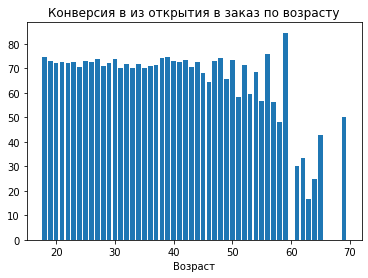

In [ ]:
#визуализация распеределения частотным графиком
plt.bar(df_merged['age'], df_merged['conversion, %'])
plt.title('Конверсия в из открытия в заказ по возрасту')
plt.xlabel('Возраст')
plt.show()

Данное распределение очень похоже на равномерное (уровень конверсии из открытия приложения в заказ держится на уровне 70%), но если смотреть на пользователей старше 60 лет, то здесь конверсия сильно падает. Возможно, эту возрастную группу нужно выводить в отдельную выборку и строить графики распеределения.

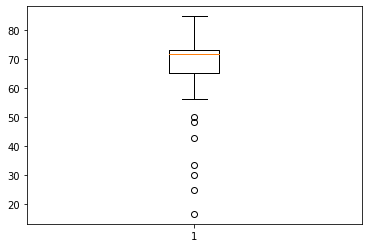

In [ ]:
#визуализация распеределения графиком "ящик с усами"
plt.boxplot(df_merged['conversion, %'])
plt.show()

Данный боксплот может являться подтверждением анализа частотного графика - наблюдаются выбросы слева - это значения для пользователей старше 60-ти лет. Имеет смысл исключить их из текущего исследования и формировать по ним отдельную выборку. 

## Метрика №5
Дистанция поездок из центра в период высокого сроса

In [ ]:
df4 = df[(df['surge'] == 'surge') & (df['ride_completed'] == 1)]

In [ ]:
#среднее
st.mean(df4['distance'])

5.403740405183119

In [ ]:
#медиана

In [ ]:
df4['distance'].median()

4.311100761327877

In [ ]:
#95-й персентиль

In [ ]:
df4['distance'].quantile(0.95)

13.839763465757215

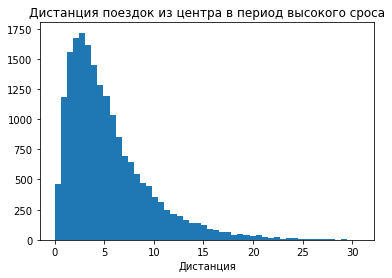

In [ ]:
#визуализация распеределения частотным графиком
plt.hist(df4['distance'], 50)
plt.title('Дистанция поездок из центра в период высокого сроса')
plt.xlabel('Дистанция')
plt.show()

Данное распеределение является логнормальным, положительно искаженным (среднее > медианы). Коэффициент эксцесса > 0 (пик острый)

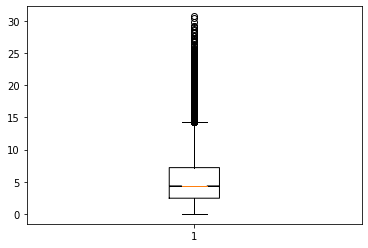

In [ ]:
#визуализация распеределения графиком "ящик с усами"
plt.boxplot(df4['distance'], 50)
plt.show()

На приведенном выше графике мы видим, что основные данные распределены компактно (размер "ящика" маленький), а так же то, что выборка имеет большой хвост и выбросы справа. Это можно интерпретировать следующим образом: большенство пользователей, заказывающих такси из центра города в период высокого спроса, ездят на короткие дистанции (что, в принципе, логично т.к. стоимость поездки в этот период выше). 